# Biological question: Are there differences in the binding distance of the same TF-pair in different clusters? - PART2

This notebook can be used to analyse if there are differences in the binding distance of the same TF-pair in two different clusters.

In "Outline of this notebook" the general steps in the notebook are explained. The details for each general step are described directly in the notebook for the general step.  
**Needed input for notebook:** .pkl file with performed market basket analysis for the second of two chosen clusters for comparison + -csv file of the results of the distance analysis of the first cluster

(you can also have a look at TF-COMB docs)

#### Exemplary Data: WP2 - A8CPH_esophagus_muscularis_mucosa_c1_Fibroblasts vs. A8CPH_esophagus_muscularis_mucosa_c7_Fibroblasts

### Outline of this notebook:
This notbook presents the second part of the analysis to find out if there is a difference in the binding distance of the same TF-pair in different clusters. If you **have not done the PART 1** yet, **do the PART 1 first**. Here the second cluster is analysed. The **results of the first cluster are then imported**, merged together and the comparison of the binding distance are done.  

    1. Implementation of distance analysis for second cluster and transfering in dataframe
    2. Importing the results of the first cluster
    3. Merging the results of first and second cluster
    4. Looking at the Distribution of the difference in binding distance between the same TF-pairs in the two clusters
    5. Comparing the binding distances between the same TF-pairs in the two clusters
    6. Possibility to have a closer look and to compare results of different clusters  

## 1. Implementation of distance analysis for cluster
0. Creation of folders for the structure if necessary, so the needed path for the output are existing
1. Read in **path of the .pkl file of the first chosen cluster from already performed market basket analysis** (alternative: perform normal market basket analysis) **(-> adjust for cluster)**
2. Using .simplify_rules(), so the duplicates of a TF-pair (because of the two orientations TF1-TF2 or TF2-TF1) are not displayed
3. Selection of TF-pairs by cosine and zscore
4. Implementation of distance analysis with considering the noisiness (lower noise, "clearer/better" analysis)
5. Creation of dataframe df_distance_clusterPART2 with the results of the distance analysis of the second cluster so it can be easily merged with the dataframe of the first cluster
6.  Reducing the TF co-occurrences by selecting the TF co-occurrences by peak hight above 2.8 (good proven boundary from other applications of distance analysis) 

In [1]:
# The following lines, initally check if all file/paths are available. 
#If a result folder does not exist it is created automatically
import os
import pathlib
if not os.path.exists("./results/distanceresultsfordifference/"):
     pathlib.Path("./results/distanceresultsfordifference/").mkdir(parents=True, exist_ok=True)
        
if not os.path.exists("./results/differencedistance_distributionplot/"):
     pathlib.Path("./results/differencedistance_distributionplot/").mkdir(parents=True, exist_ok=True)

if not os.path.exists("./results/differencedistance_plot/"):
     pathlib.Path("./results/differencedistance_plot/").mkdir(parents=True, exist_ok=True)

if not os.path.exists("./results/differencedistance_table/"):
     pathlib.Path("./results/differencedistance_table/").mkdir(parents=True, exist_ok=True)


In [2]:
import tfcomb.objects
clusterPART2_object = tfcomb.objects.CombObj().from_pickle("/mnt/workspace_stud/stud6/repositories/Datenanalyse-2021/wp6/analyse/results/wp2/main/A8CPH_esophagus_muscularis_mucosa/A8CPH_esophagus_muscularis_mucosa_c7_Fibroblasts.pkl")
clusterPART2_object

<CombObj: 470983 TFBS (746 unique names) | Market basket analysis: 381326 rules>

In [3]:
clusterPART2_object.simplify_rules()

INFO: x_threshold is None; trying to calculate optimal threshold
INFO: y_threshold is None; trying to calculate optimal threshold
INFO: Creating subset of TFBS and rules using thresholds


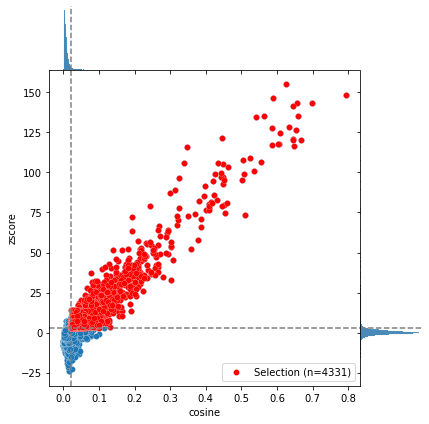

In [4]:
clusterPART2_object_selected = clusterPART2_object.select_significant_rules()

In [5]:
clusterPART2_object_selected.analyze_distances(threads=6)

INFO: DistObject successfully created! It can be accessed via combobj.distObj
INFO: Calculating distances
INFO: Normalizing data.
INFO: Done finding distances! Results are found in .distances
INFO: Run .linregress_all() to fit linear regression
INFO: Fitting linear regression. With number of threads: 6
INFO: Linear regression finished! Results can be found in .linres
INFO: Correcting background with 6 threads.
INFO: Background correction finished! Results can be found in .corrected
INFO: Smoothing signals with window size 3
INFO: Shifting signals above zero
INFO: Analyzing Signal with threads 6
INFO: Done analyzing signal. Results are found in .peaks


In [6]:
clusterPART2_object_selected.distObj.evaluate_noise(threads=6)
clusterPART2_object_selected.distObj.rank_rules()

INFO: Evaluating noisiness of the signals with 6 threads


In [7]:
df_distance_clusterPART2=clusterPART2_object_selected.distObj.peaks

In [8]:
df_distance_clusterPART2=df_distance_clusterPART2[(df_distance_clusterPART2["Peak Heights"]>2.8)]
df_distance_clusterPART2

,TF1,TF2,Distance,Peak Heights,Prominences,Threshold,TF1_TF2_count,Distance_percent,Noisiness,rank_Distance_percent,rank_Peak Heights,rank_Noisiness,mean_rank
2044,CUX2,HOXA9,50,5.715579,5.890340,2,1,1.000000,0.000602,1.0,64.0,5.0,23.333333
2280,E2F1,E2F4,50,5.715579,5.890340,2,2,1.000000,0.000602,1.0,65.0,5.0,23.666667
1032,Arx,TBR1,55,6.014238,6.293790,2,3,0.666667,0.000602,36.0,34.0,6.0,25.333333
2278,E2F1,E2F2,49,5.715476,5.890452,2,2,1.000000,0.001204,1.0,66.0,15.0,27.333333
2279,E2F1,E2F3,49,5.715476,5.890452,2,2,1.000000,0.001204,1.0,66.0,15.0,27.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1005,Arntl,ZNF148,100,2.834427,2.834427,2,137,0.029197,0.251222,1633.0,3273.0,3173.0,2693.000000
8827,SP8,ZNF148,22,2.825122,4.373991,2,1468,0.067439,0.319548,1090.0,3316.0,3699.0,2701.666667
6567,KLF16,ZBTB7A,41,2.830581,4.245251,2,292,0.068493,0.345414,1064.0,3290.0,3777.0,2710.333333
6354,KLF14,Zfx,73,2.844698,4.691814,2,498,0.050201,0.321603,1454.0,3230.0,3705.0,2796.333333


## 2. Importing the results of the first cluster
1. Import of results of the first cluster and saving them in df_distance_clusterPART1_csv dataframe

In [9]:
import pandas as pd

In [10]:
df_distance_clusterPART1_csv=pd.read_csv("./results/distanceresultsfordifference/A8CPH_esophagus_muscularis_mucosa_c1_Fibroblasts.csv")
df_distance_clusterPART1_csv

,Unnamed: 0,TF1,TF2,Distance,Peak Heights,Prominences,Threshold,TF1_TF2_count,Distance_percent,Noisiness,rank_Distance_percent,rank_Peak Heights,rank_Noisiness,mean_rank
0,2710,E2F1,E2F4,50,6.209171,6.398950,2,3,1.000000,0.000619,1.0,43.0,7.0,17.000000
1,2724,E2F4,E2F4,49,6.280213,6.472136,2,2,1.000000,0.001858,1.0,35.0,17.0,17.666667
2,2709,E2F1,E2F3,49,6.209107,6.398820,2,3,1.000000,0.001548,1.0,44.0,12.0,19.000000
3,2708,E2F1,E2F2,49,6.209107,6.398820,2,3,1.000000,0.001548,1.0,44.0,12.0,19.000000
4,2714,E2F2,E2F4,48,6.279968,6.472247,2,4,1.000000,0.003096,1.0,36.0,31.0,22.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4406,1136,Arnt,KLF14,70,2.817362,4.439406,2,219,0.068493,0.342147,1398.0,3980.0,4965.0,3447.666667
4407,671,AhrArnt,ZNF148,75,2.872835,4.090281,2,853,0.049238,0.304448,1956.0,3642.0,4754.0,3450.666667
4408,417,ATF7,Arnt,100,2.872305,2.872305,2,31,0.032258,0.299759,2130.0,3644.0,4719.0,3497.666667
4409,10985,SP9,ZEB1,0,2.806759,2.806759,2,159,0.037736,0.272308,2098.0,4028.0,4444.0,3523.333333


 ## 3. Merging the results of first and second cluster
 1. Merging the results of the distance analysis for the TF-pairs that are in first and second cluster in new dataframe df_distancedifference_2clusters so the binding distance between the two clusters can be compared. The columns with the suffix CPART1 have the information of the first cluster and columns with CPART2 have the information of the second cluster. 

In [11]:
df_distancedifference_2clusters=df_distance_clusterPART1_csv.merge(df_distance_clusterPART2,suffixes=('_CPART1', '_CPART2'), left_on =["TF1","TF2"], right_on = ["TF1","TF2"])
df_distancedifference_2clusters

,Unnamed: 0,TF1,TF2,Distance_CPART1,Peak Heights_CPART1,Prominences_CPART1,Threshold_CPART1,TF1_TF2_count_CPART1,Distance_percent_CPART1,Noisiness_CPART1,...,Peak Heights_CPART2,Prominences_CPART2,Threshold_CPART2,TF1_TF2_count_CPART2,Distance_percent_CPART2,Noisiness_CPART2,rank_Distance_percent_CPART2,rank_Peak Heights_CPART2,rank_Noisiness_CPART2,mean_rank_CPART2
0,2710,E2F1,E2F4,50,6.209171,6.398950,2,3,1.000000,0.000619,...,5.715579,5.890340,2,2,1.000000,0.000602,1.0,65.0,5.0,23.666667
1,2709,E2F1,E2F3,49,6.209107,6.398820,2,3,1.000000,0.001548,...,5.715476,5.890452,2,2,1.000000,0.001204,1.0,66.0,15.0,27.333333
2,2708,E2F1,E2F2,49,6.209107,6.398820,2,3,1.000000,0.001548,...,5.715476,5.890452,2,2,1.000000,0.001204,1.0,66.0,15.0,27.333333
3,2714,E2F2,E2F4,48,6.279968,6.472247,2,4,1.000000,0.003096,...,5.715168,5.890778,2,2,1.000000,0.001805,1.0,67.0,26.0,31.333333
4,2718,E2F3,E2F4,48,6.279968,6.472247,2,4,1.000000,0.003096,...,5.715168,5.890778,2,2,1.000000,0.001805,1.0,67.0,26.0,31.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2802,10977,SP9,ZBTB14,0,2.860992,2.860992,2,446,0.049327,0.254059,...,4.702214,4.702214,2,388,0.059278,0.249042,1294.0,270.0,3151.0,1571.666667
2803,12006,ZNF148,Znf281,7,2.889969,2.889969,2,787,0.062262,0.338625,...,3.146918,3.146918,2,653,0.067381,0.261715,1092.0,2177.0,3287.0,2185.333333
2804,7550,KLF14,Zfx,73,2.894178,4.550048,2,549,0.049180,0.292433,...,2.844698,4.691814,2,498,0.050201,0.321603,1454.0,3230.0,3705.0,2796.333333
2805,1136,Arnt,KLF14,70,2.817362,4.439406,2,219,0.068493,0.342147,...,2.956608,4.677112,2,191,0.078534,0.282474,846.0,2804.0,3479.0,2376.333333


In [12]:
pd.set_option('max_columns', None)
pd.set_option('max_rows', 50)

## 4. Looking at the Distribution of the difference in binding distance between the same TF-pairs in the two clusters
1. Calculation of the difference between the binding distance per TF-pair
2. Calcultation of the average peak Height of a TF-pair as an additional assessment factor
3. Selection of TF-pairs above 100 counts as TF-pairs of interest so they so probability is higher that they are important for cluster
4. Sorting the dataframe df_distancedifference_2clusters by the difference in the binding distance for plotting them
5. Calculating the Distribution in the difference in binding distance. This can be used for comparing different two clusters (2 clusters same celltype vs 2 clusters different celltype) concering their distribution in difference in binding distance
6. Plotting the Distribution of the difference in binding distance and saving the **distribution plot .png file (-> adjust for cluster)**


In [13]:
df_distancedifference_2clusters['Difference between Distance'] = abs(df_distancedifference_2clusters['Distance_CPART1'] - df_distancedifference_2clusters['Distance_CPART2'])
df_distancedifference_2clusters['Average Peak Height'] = ((df_distancedifference_2clusters['Peak Heights_CPART1'] + df_distancedifference_2clusters['Peak Heights_CPART2'])/2)
df_distancedifference_2clusters['TF-pair'] = df_distancedifference_2clusters['TF1'] + " + " + df_distancedifference_2clusters['TF2']
df_distancedifference_2clusters = df_distancedifference_2clusters[(df_distancedifference_2clusters["TF1_TF2_count_CPART1"]>100) &(df_distancedifference_2clusters["TF1_TF2_count_CPART2"]>100)]
df_distancedifference_2clusters_sorted=df_distancedifference_2clusters.sort_values(by=['Difference between Distance'])
df_differencedistance_distribution=df_distancedifference_2clusters_sorted['Difference between Distance'].value_counts()


In [14]:
df_differencedistance_distribution

0     260
1      57
2      21
31     13
21      9
     ... 
56      1
57      1
58      1
61      1
41      1
Name: Difference between Distance, Length: 73, dtype: int64

In [15]:
df_distancedifference_2clusters_sorted

,Unnamed: 0,TF1,TF2,Distance_CPART1,Peak Heights_CPART1,Prominences_CPART1,Threshold_CPART1,TF1_TF2_count_CPART1,Distance_percent_CPART1,Noisiness_CPART1,rank_Distance_percent_CPART1,rank_Peak Heights_CPART1,rank_Noisiness_CPART1,mean_rank_CPART1,Distance_CPART2,Peak Heights_CPART2,Prominences_CPART2,Threshold_CPART2,TF1_TF2_count_CPART2,Distance_percent_CPART2,Noisiness_CPART2,rank_Distance_percent_CPART2,rank_Peak Heights_CPART2,rank_Noisiness_CPART2,mean_rank_CPART2,Difference between Distance,Average Peak Height,TF-pair
60,11983,ZNF135,ZNF135,17,6.251750,6.658399,2,1020,0.727451,0.019374,72.0,39.0,251.0,120.666667,17,6.391862,6.817978,2,342,0.760234,0.023446,25.0,16.0,343.0,128.000000,0,6.321806,ZNF135 + ZNF135
2123,10967,SP9,TFEC,5,3.127144,3.668431,2,139,0.093525,0.188648,805.0,2621.0,2692.0,2039.333333,5,3.140795,3.573709,2,126,0.103175,0.194453,475.0,2195.0,2360.0,1676.666667,0,3.133970,SP9 + TFEC
2104,8467,KLF6,Wt1,73,2.870402,4.490088,2,220,0.063636,0.181765,1573.0,3656.0,2504.0,2577.666667,73,3.690976,5.237969,2,144,0.083333,0.352766,747.0,993.0,3799.0,1846.333333,0,3.280689,KLF6 + Wt1
2089,3268,EGR3,KLF4,26,3.489529,5.317210,2,206,0.072816,0.207801,1253.0,1590.0,3174.0,2005.666667,26,4.205848,5.808030,2,157,0.108280,0.243771,437.0,480.0,3086.0,1334.333333,0,3.847689,EGR3 + KLF4
2080,9544,NFYC,SP4,7,3.685522,4.917715,2,143,0.118881,0.254912,598.0,1213.0,4175.0,1995.333333,7,3.622039,3.921976,2,127,0.125984,0.234606,360.0,1110.0,2966.0,1478.666667,0,3.653780,NFYC + SP4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2399,6883,IRF1,ZNF384,100,3.122938,3.122938,2,432,0.025463,0.228342,2155.0,2630.0,3629.0,2804.666667,3,3.568245,3.568245,2,191,0.120419,0.167054,381.0,1200.0,1880.0,1153.666667,97,3.345592,IRF1 + ZNF384
2676,1321,Arntl,SP3,100,3.200194,3.200194,2,122,0.040984,0.235704,2072.0,2365.0,3805.0,2747.333333,3,2.919351,2.919351,2,106,0.094340,0.223644,573.0,2928.0,2802.0,2101.000000,97,3.059773,Arntl + SP3
2796,2375,CTCFL,KLF14,100,2.914054,2.914054,2,373,0.026810,0.249512,2150.0,3450.0,4076.0,3225.333333,1,2.818142,2.818142,2,386,0.072539,0.177508,966.0,3342.0,2093.0,2133.666667,99,2.866098,CTCFL + KLF14
1662,11716,Wt1,ZNF740,100,2.945111,2.945111,2,295,0.037288,0.211066,2101.0,3324.0,3248.0,2891.000000,0,5.199394,5.199394,2,226,0.079646,0.130627,821.0,148.0,1413.0,794.000000,100,4.072252,Wt1 + ZNF740


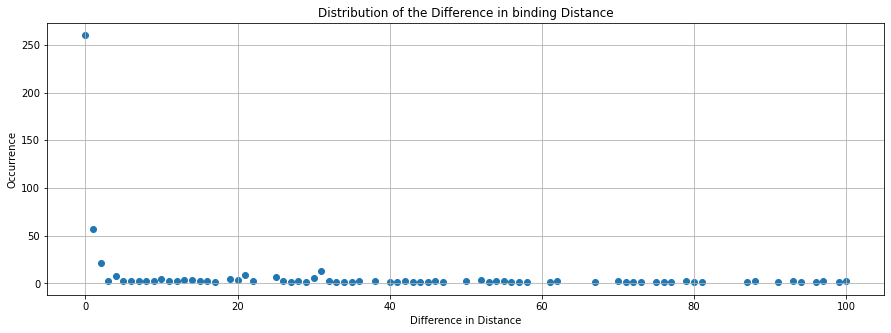

In [16]:
import matplotlib.pyplot as plt

differencedistance = df_differencedistance_distribution.keys()
occurrence = df_differencedistance_distribution

plt.figure(figsize=(15, 5))
plt.scatter(differencedistance,occurrence)
plt.xticks
plt.grid(True)
plt.xlabel('Difference in Distance')
plt.ylabel('Occurrence')
plt.title('Distribution of the Difference in binding Distance')

plt.savefig("./results/differencedistance_distributionplot/A8CPH_esophagus_muscularis_mucosa_c1_Fibroblasts__A8CPH_esophagus_muscularis_mucosa_c7_Fibroblasts.png") 
plt.show()

## 5. Comparing the binding distances between the same TF-pairs in the two clusters
1. Selecting the difference in binding distance over 10 since now we only want to look at the TF-pairs with a difference in binding distance
2. Sorting the TF-Pairs by noisiness of the first cluster and selecting the first 100. The noisiness is selected as an assessment factor since it distinguishes a clear signal from noisy signal in the distance analysis what was ranged as important factor for the qualitiy of the TF-pair binding distance. The reason for the selection of 100 TF-pairs is for the readability of the figure and can also be adjusted reasonable (as well as the other factors)
3. Sorting the dataframe df_distancedifference_2clusters_withoutlowdifference_noisinesstop100 by the difference in the binding distance for plotting them and **saving finished distance difference table in .csv file (-> adjust for cluster)**
10. Plotting the difference in distance over the TF-pairs and saving the **difference in distnace plot in a .png file (-> adjust for cluster)**

In [17]:
df_distancedifference_2clusters_withoutlowdifference = df_distancedifference_2clusters[(df_distancedifference_2clusters["Difference between Distance"]>10)]
df_distancedifference_2clusters_withoutlowdifference_noisinesstop100=df_distancedifference_2clusters_withoutlowdifference.sort_values(by=['Noisiness_CPART1']).head(100)
df_distancedifference_2clusters_withoutlowdifference_noisinesstop100_sorted=df_distancedifference_2clusters_withoutlowdifference_noisinesstop100.sort_values(by=['Difference between Distance'])
df_distancedifference_2clusters_withoutlowdifference_noisinesstop100_sorted


,Unnamed: 0,TF1,TF2,Distance_CPART1,Peak Heights_CPART1,Prominences_CPART1,Threshold_CPART1,TF1_TF2_count_CPART1,Distance_percent_CPART1,Noisiness_CPART1,rank_Distance_percent_CPART1,rank_Peak Heights_CPART1,rank_Noisiness_CPART1,mean_rank_CPART1,Distance_CPART2,Peak Heights_CPART2,Prominences_CPART2,Threshold_CPART2,TF1_TF2_count_CPART2,Distance_percent_CPART2,Noisiness_CPART2,rank_Distance_percent_CPART2,rank_Peak Heights_CPART2,rank_Noisiness_CPART2,mean_rank_CPART2,Difference between Distance,Average Peak Height,TF-pair
275,9010,MEF2D,ZNF135,33,3.093817,3.517626,2,1256,0.225318,0.015688,320.0,2747.0,202.0,1089.666667,44,2.815199,3.275693,2,356,0.210674,0.015774,175.0,3349.0,219.0,1247.666667,11,2.954508,MEF2D + ZNF135
265,8979,MEF2C,ZNF135,31,3.118135,3.575055,2,1243,0.221239,0.013625,325.0,2654.0,169.0,1049.333333,43,2.840292,3.290561,2,354,0.206215,0.014954,181.0,3248.0,210.0,1213.000000,12,2.979213,MEF2C + ZNF135
2055,8365,KLF5,ZBTB33,17,3.332320,5.103711,2,154,0.090909,0.204654,849.0,1979.0,3092.0,1973.333333,29,2.845245,4.203250,2,139,0.093525,0.216537,584.0,3228.0,2698.0,2170.000000,12,3.088782,KLF5 + ZBTB33
1501,8401,KLF6,KLF6,21,3.444475,5.235153,2,262,0.087786,0.168121,908.0,1698.0,2004.0,1536.666667,8,2.972572,3.706470,2,216,0.092593,0.310108,594.0,2755.0,3656.0,2335.000000,13,3.208524,KLF6 + KLF6
2498,1605,BHLHE40,KLF5,9,3.167112,4.483139,2,131,0.083969,0.241235,989.0,2475.0,3909.0,2457.666667,24,3.432292,4.891957,2,103,0.106796,0.156107,446.0,1440.0,1714.0,1200.000000,15,3.299702,BHLHE40 + KLF5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2071,1290,Arntl,KLF15,4,3.178863,3.178863,2,220,0.081818,0.181622,1032.0,2427.0,2501.0,1986.666667,100,4.129402,4.129402,2,196,0.040816,0.21324,1577.0,531.0,2659.0,1589.000000,96,3.654133,Arntl + KLF15
2399,6883,IRF1,ZNF384,100,3.122938,3.122938,2,432,0.025463,0.228342,2155.0,2630.0,3629.0,2804.666667,3,3.568245,3.568245,2,191,0.120419,0.167054,381.0,1200.0,1880.0,1153.666667,97,3.345592,IRF1 + ZNF384
2676,1321,Arntl,SP3,100,3.200194,3.200194,2,122,0.040984,0.235704,2072.0,2365.0,3805.0,2747.333333,3,2.919351,2.919351,2,106,0.094340,0.223644,573.0,2928.0,2802.0,2101.000000,97,3.059773,Arntl + SP3
1661,11715,Wt1,ZNF740,0,4.758311,4.758311,2,295,0.071186,0.211066,1301.0,367.0,3248.0,1638.666667,100,2.821560,2.821560,2,226,0.039823,0.130627,1589.0,3331.0,1413.0,2111.000000,100,3.789935,Wt1 + ZNF740


In [18]:
df_distancedifference_2clusters_withoutlowdifference_noisinesstop100_sorted.to_csv("./results/differencedistance_table/A8CPH_esophagus_muscularis_mucosa_c1_Fibroblasts__A8CPH_esophagus_muscularis_mucosa_c7_Fibroblasts.csv")

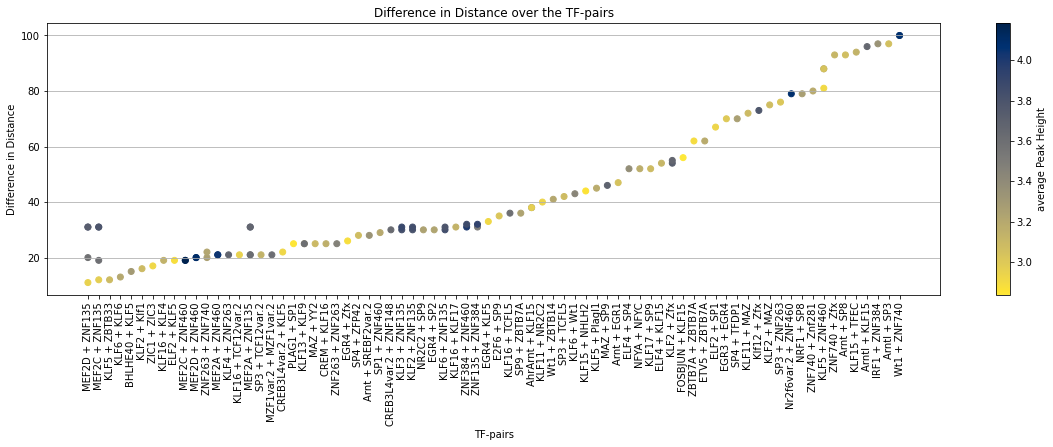

In [19]:
differencedistance = df_distancedifference_2clusters_withoutlowdifference_noisinesstop100_sorted['Difference between Distance']
TFpairs = df_distancedifference_2clusters_withoutlowdifference_noisinesstop100_sorted['TF-pair']
averagepeakheight = df_distancedifference_2clusters_withoutlowdifference_noisinesstop100_sorted['Average Peak Height']

plt.figure(figsize=(20, 5))
plt.scatter(TFpairs,differencedistance, c=averagepeakheight, cmap = 'cividis_r')
plt.xticks(rotation='vertical')
plt.grid(True, axis = 'y')
plt.xlabel('TF-pairs')
plt.ylabel('Difference in Distance')
cbar = plt.colorbar()
cbar.set_label("average Peak Height")
plt.title('Difference in Distance over the TF-pairs')


plt.savefig("./results/differencedistance_plot/A8CPH_esophagus_muscularis_mucosa_c1_Fibroblasts__A8CPH_esophagus_muscularis_mucosa_c7_Fibroblasts.png") 
plt.show()

##     5. Possibility to have a closer look and to compare results of different clusters  

####  Possibility to import other plots from different two clusters for comparisons (->  adjust for cluster)

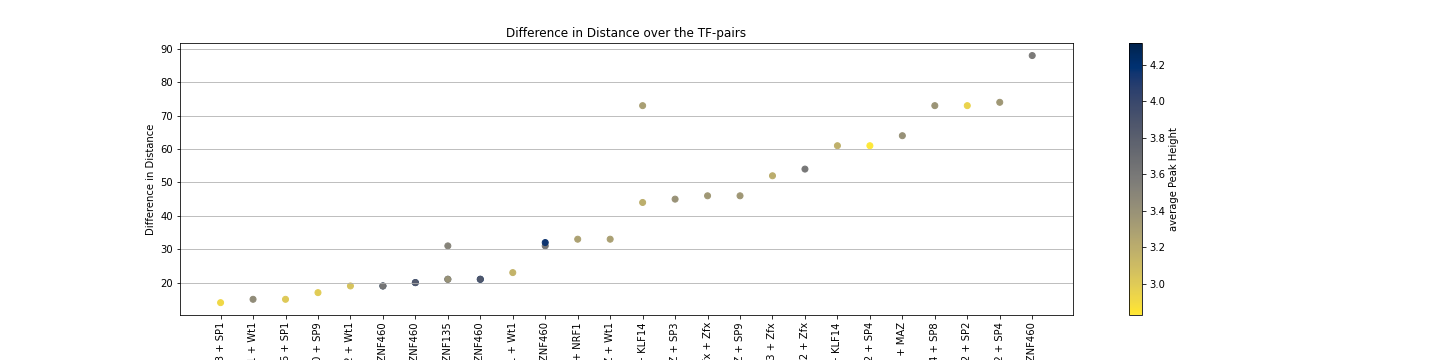

In [20]:
from PIL import Image

image = Image.open("/mnt/workspace_stud/stud7/Datenanalyse-2021/wp6/analyse/results/differencedistance_plot/A8CPH_esophagus_muscularis_mucosa_c1_Fibroblasts__ACCQ1_colon_transverse_c3_Enterocytes.png")
image.show()